<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Lab 7**

In this assignment, we explore the behavior of the binary cross-entropy loss in the context of the Forward Stagewise Additive Modeling (FSAM) procedure. Specifically, we compare two scenarios:

- **Scenario A**: Fitting a constant predictor from scratch

- **Scenario B**: Adjusting an existing predictor by adding a constant shift

We will work with the binary cross-entropy loss defined as $$L(y,z) = -y\log(\sigma(z)) -(1-y)\log(1-\sigma(z))$$
where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

We assume that we are given:

- A dataset of binary labels $y_i$.
- Two constants: $m$ (the number of ones) and $k$ (the number of zeros) in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

# **1. Derivation and Analysis**

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, we will build a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. The optimization problem is formulated as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$

In order to do this, we will minimize the function $$\ell(\lambda) = \sum_{i=1}^{n} L(y_i,\lambda)= \sum_{i=1}^{n} \left[ -y_i \log(\sigma(\lambda)) - (1 - y_i) \log(1 - \sigma(\lambda)) \right]$$

First we write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

*We will use a known identity for the derivative of the sigmoid function that will be very useful: $$\sigma'(\lambda)=\frac{e^{-\lambda}}{(1+e^{-\lambda})^2} = \sigma(\lambda) \frac{e^{-\lambda}}{1+e^{-\lambda}} = \sigma(\lambda) (1-\sigma(\lambda))
$$

Now,
$$\frac{d}{d\lambda}L(y,\lambda) = -y \frac{\sigma'(\lambda)}{\sigma(\lambda)} +(1-y)\frac{\sigma'(\lambda)}{1-\sigma(\lambda)} = -y \frac{1}{\sigma(\lambda)} \sigma(\lambda) (1-\sigma(\lambda)) +(1-y)\frac{1}{1-\sigma(\lambda)} \sigma(\lambda) (1-\sigma(\lambda)) = -y(1-\sigma(\lambda))+(1-y)\sigma(\lambda) = -y+y \sigma(\lambda)+\sigma(\lambda)-y \sigma(\lambda) = \sigma(\lambda) -y
$$

Therefore,

$$\frac{d\ell}{d\lambda} = \sum_{i=1}^{n} (\sigma(\lambda) - y_i) = \sum_{i=1}^{n} \sigma(\lambda) - \sum_{i=1}^{n} y_i = n \sigma(\lambda) - m = 0 \Rightarrow \sigma(\lambda) = \frac{m}{n}
$$

Substituting in the sigmoid function, $$\sigma(\lambda) = \frac{1}{1+e^{-\lambda}} = \frac{m}{n} \Rightarrow 1 + e^{-\lambda} = \frac{n}{m} \Rightarrow e^{-\lambda} = \frac{n}{m} -1 = \frac{n-m}{m} = \frac{k}{m} \Rightarrow \lambda^* = -\log(\frac{k}{m}) = \log(\frac{m}{k})
$$

Now it is only left verifying that the critical point corresponds to a minimum. To do this, we we compute the second derivative and substitute.
$$\frac{d^2 L}{d\lambda^2} = \sigma'(\lambda) = \sigma(\lambda) (1-\sigma(\lambda)) \Rightarrow  \frac{d\ell^2}{d\lambda^2} = \sum_{i=1}^{n}\sigma(\lambda) (1-\sigma(\lambda)) = n\sigma(\lambda) (1-\sigma(\lambda))
$$
We evaluate the sigmoid function in $\lambda^*$:
$$\sigma(\lambda^*) = \frac{1}{1+e^{-\log{\frac{m}{k}}}} = \frac{1}{1+\frac{k}{m}} = \frac{m}{m+k} = \frac{m}{n}
$$
And we finally substitute in $\ell^2$ and see that it is strictly greater than zero:
$$\frac{d\ell^2}{d\lambda^2}(\lambda^*) = n \sigma(\lambda^*) (1-\sigma(\lambda^*)) = n \frac{m}{n} (1-\frac{m}{n}) = m \frac{n-m}{n} = \frac{mk}{n} > 0
$$

**Interpretation:**

The optimal constant predictor $\lambda^*=\log(\frac{m}{k})$ in binary cross-entropy loss corresponds to the logaritm of the odds of the positive class in the dataset.

The empirical probability of $y_i = 1$ is $p = \frac{m}{n}$

Therefore, $$\lambda^* = \log(\frac{m}{k}) = \log(\frac{m/n}{k/n}) = \log(\frac{p}{1-p})
$$

It represents the best possible prediction (in logit space) you can make without looking at any features, solely based on the overall class balance in the data.

### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now we assume we already have an existing predictor $f_i = f_{m-1}(x_i)$. We wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$

We will try to minimize the function $$\ell(\lambda) = \sum_{i=1}^{n} L(y_i, f_i+\lambda)
$$

We already know that $$ \frac{d}{d\lambda} L(y,\lambda) = \sigma(\lambda) - y \Rightarrow \frac{d}{d\lambda} L(y,f_i + \lambda) = \sigma(f_i + \lambda) - y
$$

Then,
$$\frac{d\ell}{d\lambda}(\lambda) = \sum_{i=1}^{n} [\sigma(f_i + \lambda) - y] = \sum_{i=1}^{n} \sigma(f_i + \lambda) - m = 0 \Rightarrow \sum_{i=1}^{n} \sigma(f_i + \lambda) = m
$$
where
$$
\sum_{i=1}^{n} \sigma(f_i + \lambda) = \sum_{i=1}^{n} \frac{1}{1+e^{-(f_i+\lambda)}}
$$

Because the equation involves a sum of non-linear functions, each depending on a shifted input, there is no algebraic way to simplify this or to isolate $\lambda$. We must solve it numerically.

**Role of the Sigmoid Function's Non-Linearity:**

The sigmoid function turns any number into a value between 0 and 1, but it does this in a non-linear, S-shaped way.

When we add the same shift $\lambda$ to different values $f_i$, the effect is not the same for all:
- If $f_i$ is large, sigmoid is already close to 1, so adding $\lambda$ changes almost nothing.
- If $f_i$ is small, the sigmoid is more sensitive, so $\lambda$ has a bigger effect.

This uneven behavior makes the equation hard to solve, because each data point reacts differently to the same shift.



# **2. Loss Landscape Exploration (Python)**

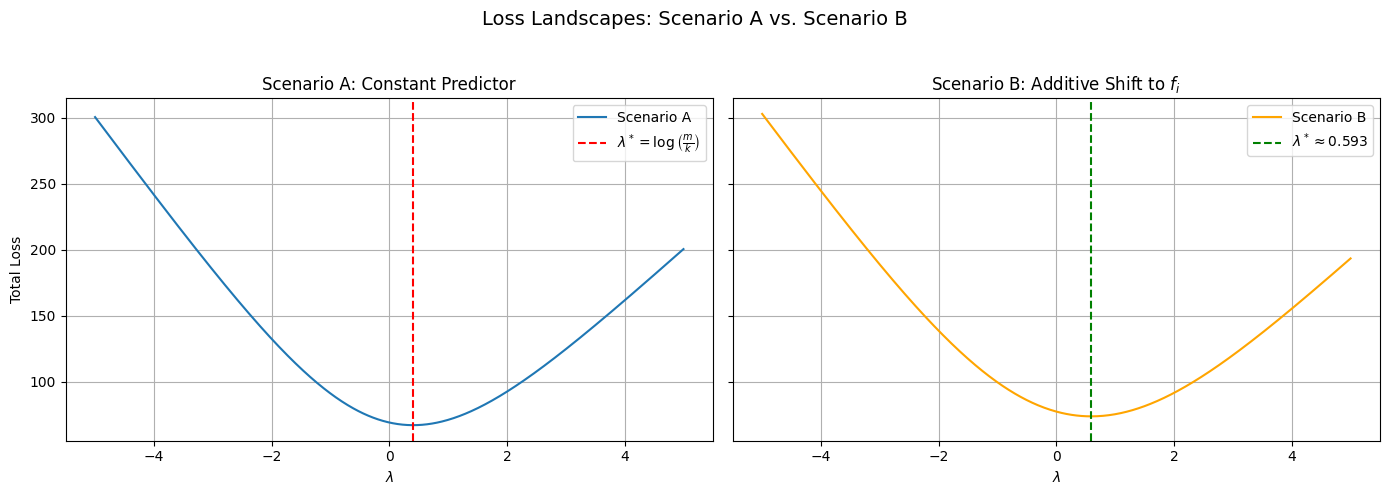

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Set values
n = 100  # total number of data points
m = 60   # number of positive labels (y = 1)
k = n - m  # number of negative labels (y = 0)

# Generate labels: 1 for first m samples, 0 for the rest
y = np.array([1]*m + [0]*k)

# Define sigmoid and binary cross-entropy loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, z):
    sig = sigmoid(z)
    return -y * np.log(sig) - (1 - y) * np.log(1 - sig)

# Define a range of lambda values to evaluate
lambda_values = np.linspace(-5, 5, 600)

# Generate random base predictions f_i from normal distribution
f_i = np.random.normal(loc=0.0, scale=1.0, size=n)

# Compute total loss for each lambda in both scenarios
loss_values_A = [np.sum(binary_cross_entropy(y, lam)) for lam in lambda_values]
loss_values_B = [np.sum(binary_cross_entropy(y, f_i + lam)) for lam in lambda_values]

# Numerical minimization for Scenario B
def total_loss_scenario_B(lam):
    return np.sum(binary_cross_entropy(y, f_i + lam))

result_B = minimize_scalar(total_loss_scenario_B, bounds=(-5, 5), method='bounded')
lambda_star_B = result_B.x

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot Scenario A
axes[0].plot(lambda_values, loss_values_A, label='Scenario A')
axes[0].axvline(x=np.log(m / k), color='red', linestyle='--', label=r'$\lambda^* = \log\left(\frac{m}{k}\right)$')
axes[0].set_title('Scenario A: Constant Predictor')
axes[0].set_xlabel(r'$\lambda$')
axes[0].set_ylabel('Total Loss')
axes[0].grid(True)
axes[0].legend()

# Plot Scenario B
axes[1].plot(lambda_values, loss_values_B, label='Scenario B', color='orange')
axes[1].axvline(x=lambda_star_B, color='green', linestyle='--', label=rf'$\lambda^* \approx {lambda_star_B:.3f}$')
axes[1].set_title('Scenario B: Additive Shift to $f_i$')
axes[1].set_xlabel(r'$\lambda$')
axes[1].grid(True)
axes[1].legend()

# Show plot
plt.suptitle('Loss Landscapes: Scenario A vs. Scenario B', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Discussion: Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?**

The loss landscape in Scenario A is simpler than in Scenario B because the binary cross-entropy loss is computed using a constant prediction $\lambda$ for all data points. The resulting loss function is unimodal (has a single minimum) and easy to optimize analytically.

In fact, the minimum has a closed-form solution:
$$\lambda^* = \log(\frac{k}{m})$$

In Scenario B, we apply a constant shift $\lambda$ to existing predictions $f_i$. The total loss becomes:
$$\ell(\lambda) = \sum_{i=1}^{n} L(y_i, f_i+\lambda)$$
Here, the same $\lambda$ is added to different $f_i$, so each sigmoid term $\sigma(f_i+\lambda)$ reacts differently. As a result, the total loss is still unimodal and smooth, but has no closed-form solution. It must be minimized numerically. Because it is differentiable and unimodal, it is well-suited for numerical optimization using methods.

The difficulty in Scenario B comes from the non-linearity of the sigmoid function applied to each shifted input  $f_i+\lambda$. Since each point reacts differently to $\lambda$, the resulting equation:
$$\sum_{i=1}^{n} \sigma(f_i + \lambda) = m $$

is an implicit, non-linear equation in $\lambda$, and cannot be solved analytically even though the loss landscape is not complex or multimodal.